# Золотодобыча

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В распоряжении данные с параметрами добычи и очистки. 
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Работа состоит из следующих этапов:
1. Подготовка данных;
2. Проведение исследовательского анализа данных;
3. Обучение модели.

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import pandas as pd
import warnings
import math
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    make_scorer
)
from sklearn.model_selection import cross_val_score
from scipy.stats import randint as sp_randInt
import numpy as np
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')

In [3]:
display(df_train.head())
display(df_test.head())
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()
df_test.info()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

calculate_recovery = (c * (f - t)) / (f * (c - t)) * 100

In [6]:
mean_absolute_error(df_train['rougher.output.recovery'], calculate_recovery)

9.73512347450521e-15

In [7]:
df_train['rougher.output.recovery'].median()

85.2994620986978

__Вывод__ 

Средняя абсолютная ошибка достаточно мала, можно считать что эффективность обогащения рассчитана правильно.

In [8]:
clean_test = []
for i in df_train:
    if i not in df_test:
        clean_test.append(i)
clean_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Признаки, отсутсвующие в тестовой выборке представляют собой различные показания на выходе этапов очистки и флотации, а так же расчетные величины, которые приведут к утечке целевого признака.

Произведем предобработку данных.

In [9]:
def check_passes():
    print(df_train.isna().sum().sum(), df_train.shape)
    print(df_test.isna().sum().sum(), df_test.shape)
    print(df_full.isna().sum().sum(), df_full.shape)
    
check_passes()

4100 (14149, 87)
90 (5290, 53)
4481 (19439, 87)


In [10]:
df_train['date'].isna().sum()

0

Пропуски отсутсвуют в временах замера параметров, приведем эти данные к одному виду:

In [11]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S').round("H")
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S').round("H")
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S').round("H")

Теперь можем определить, можно ли заполнить пропуски из исходных данных.

In [12]:
def check_passes_in_full(check_df):
    check = 0
    for c in check_df:
        if c == 'date':
            continue
        for s in check_df[c].index:
            if math.isnan(check_df[c][s]):
                if not(math.isnan(df_full.loc[df_full['date'] == check_df['date'][s]][c])):
                    check += 1
    print(check)               

In [13]:
check_passes_in_full(df_train)  
check_passes_in_full(df_test)  

0
0


In [14]:
df_train.loc[:, df_train.columns !='date'] = df_train.loc[:, df_train.columns !='date'].interpolate(limit_direction='both')
df_test.loc[:, df_test.columns !='date'] = df_test.loc[:, df_test.columns !='date'].interpolate(limit_direction='both')

In [15]:
check_passes()

0 (14149, 87)
0 (5290, 53)
4481 (19439, 87)


Добавим в тестовую выборку целевые признаки из исходных данных.

In [16]:
df_test_m = df_test.merge(df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], how='left', on='date')
df_test_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [17]:
def del_zeros(data):
    zeros_index = []
    for i in data.loc[:, data.columns != 'date']:
        for j in list(data.loc[data[i] == 0].index):
            if j not in zeros_index:
                zeros_index.append(j)
    print(len(zeros_index))
    return data.drop(zeros_index, axis=0)

In [18]:
df_train = del_zeros(df_train)
df_test = del_zeros(df_test)
df_full = del_zeros(df_full)

1218
1
1545


## Исследовательский анализ данных

Оценим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Распределим металлы по этапам очистки.

In [19]:
def pulling(arr, key, meaning):
    if key in arr:
        arr[key].append(meaning)
    else:
        arr[key] = [meaning]
    return concentrate

In [20]:
concentrate = {}
for i in df_full.columns:
    if '.concentrate_au' in i:
        concentrate = pulling(concentrate, 'au', i)
    elif '.concentrate_pb' in i:
        concentrate = pulling(concentrate, 'pb', i)
    elif '.concentrate_ag' in i:
        concentrate = pulling(concentrate, 'ag', i)  
concentrate

{'ag': ['final.output.concentrate_ag',
  'primary_cleaner.output.concentrate_ag',
  'rougher.output.concentrate_ag'],
 'pb': ['final.output.concentrate_pb',
  'primary_cleaner.output.concentrate_pb',
  'rougher.output.concentrate_pb'],
 'au': ['final.output.concentrate_au',
  'primary_cleaner.output.concentrate_au',
  'rougher.output.concentrate_au']}

In [21]:
def smooth(x_data, y_data, win=4): # Сглаживание графика
    filt = np.ones(win)/win
    mov = win//2
    return x_data[mov:-mov], np.convolve(y_data, filt, mode='same')[mov:-mov]

Построим графики.

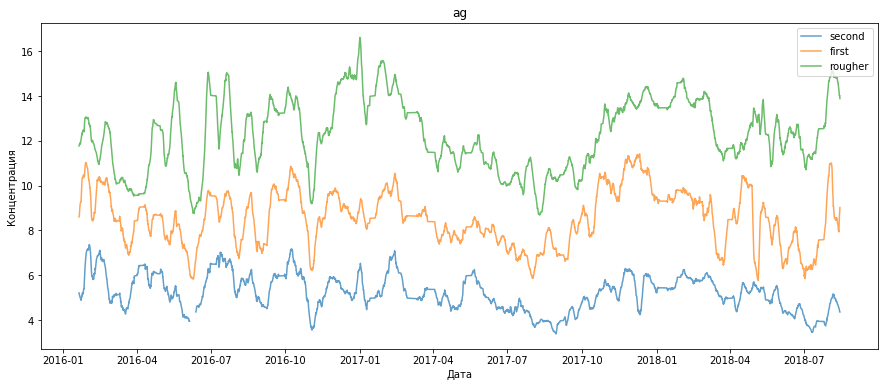

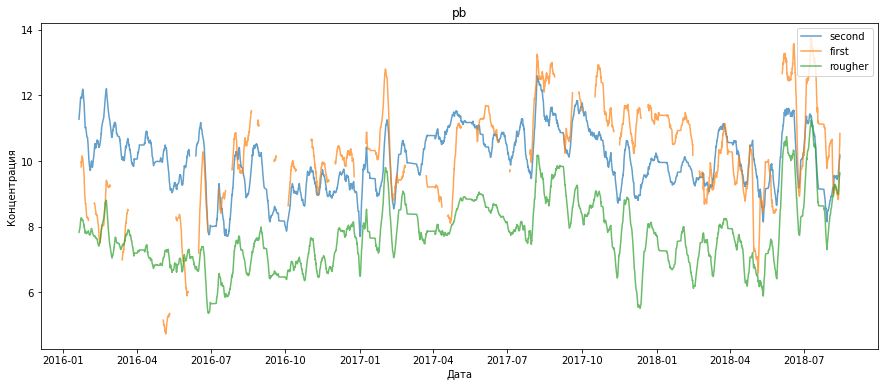

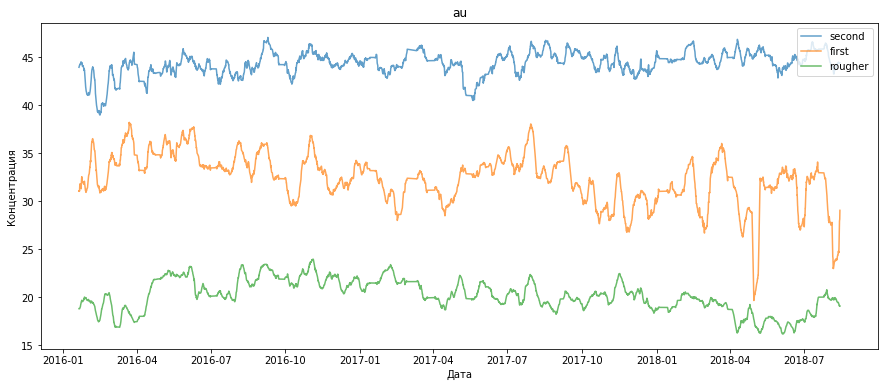

In [22]:
plt.rcParams['figure.figsize'] = [15, 6]
for i in concentrate:
    for s in concentrate[i]:
        if 'final' in s:
            label = 'second'
        elif 'primary' in s:
            label = 'first'
        elif 'rougher' in s:
            label = 'rougher'
        X, Y = smooth(df_full['date'], df_full[s], win=24*7)
        plt.plot(X, Y, label = label, alpha = 0.7)
        plt.title(i)
        plt.xlabel('Дата')
        plt.ylabel('Концентрация')
        plt.legend(loc = 'upper right')
    plt.show()

__Вывод__

После различных этапов очистки концентрация серебра уменьшается примерно в 2 раза, свинца практически не изменяется, а золота увеличивается в 2 раза.


Приведем распределения размеров гранул сырья на обучающей и тестовой выборках.

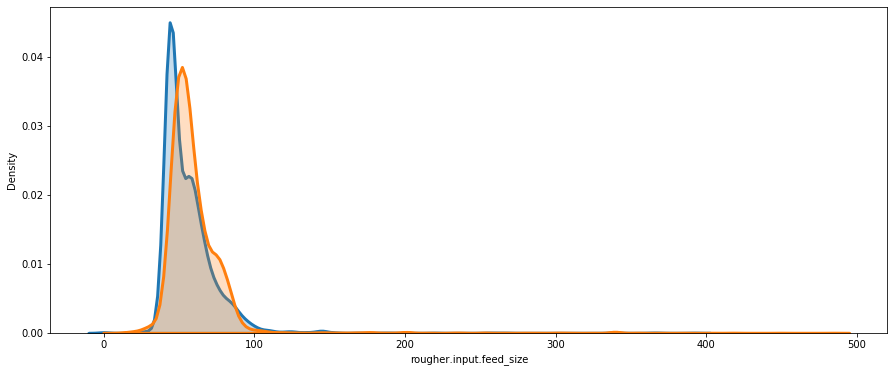

In [23]:
sns.distplot(df_test['rougher.input.feed_size'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}) 
sns.distplot(df_train['rougher.input.feed_size'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3});

Разница не значительная, оценка моделей будет корректной.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [24]:
for i in df_full.columns:
    if '.feed_au' in i:
        concentrate = pulling(concentrate, 'au', i)
    elif '.feed_pb' in i:
        concentrate = pulling(concentrate, 'pb', i)
    elif '.feed_ag' in i:
        concentrate = pulling(concentrate, 'ag', i)  
concentrate

{'ag': ['final.output.concentrate_ag',
  'primary_cleaner.output.concentrate_ag',
  'rougher.output.concentrate_ag',
  'rougher.input.feed_ag'],
 'pb': ['final.output.concentrate_pb',
  'primary_cleaner.output.concentrate_pb',
  'rougher.output.concentrate_pb',
  'rougher.input.feed_pb'],
 'au': ['final.output.concentrate_au',
  'primary_cleaner.output.concentrate_au',
  'rougher.output.concentrate_au',
  'rougher.input.feed_au']}

In [25]:
concentrate_sum = copy.deepcopy(concentrate)
for i in concentrate_sum:
    concentrate_sum[i].pop(1)
concentrate_sum

{'ag': ['final.output.concentrate_ag',
  'rougher.output.concentrate_ag',
  'rougher.input.feed_ag'],
 'pb': ['final.output.concentrate_pb',
  'rougher.output.concentrate_pb',
  'rougher.input.feed_pb'],
 'au': ['final.output.concentrate_au',
  'rougher.output.concentrate_au',
  'rougher.input.feed_au']}

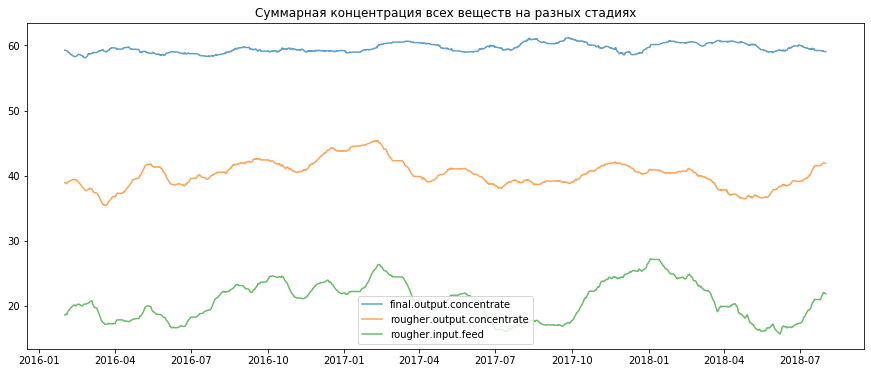

In [26]:
sum_el = []
for step in range(3):
    columns = []
    for i in concentrate_sum:
        columns.append(concentrate_sum[i][step])
    sum_el.append(df_full[columns].sum(axis=1))
    X, Y = smooth(df_full['date'], sum_el[step], win=24*7*4)
    plt.plot(X, Y, alpha=0.7, label=concentrate_sum['au'][step].split('_')[0])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.legend()
plt.show()

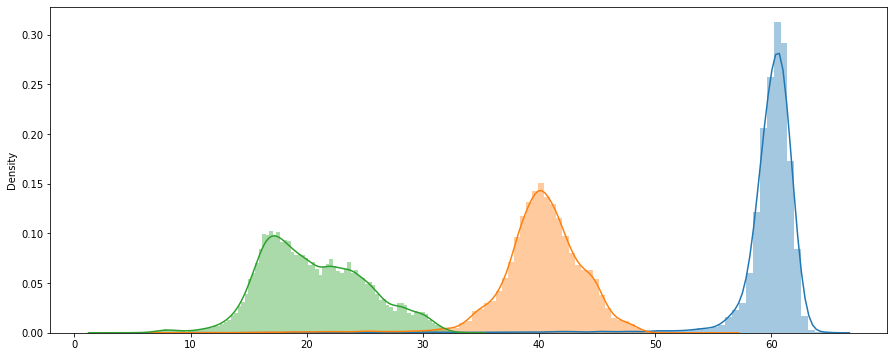

In [27]:
for i in sum_el:
    sns.distplot(i, bins=100)

С этапами очистки растет концентрация металлических элементов, более 40% которых составляет золото, но остаются другие примеси.

## Построение и обучение модели

Напишем функцию для вычисления sMAPE.

In [28]:
def smape(predict, target):
    return round(sum(abs(predict - target)/abs(predict + target)/2)*100/len(predict), 2)

Обучим разные модели и оцените их качество кросс-валидацией.

Выделим целевые признаки тренировочной выборки.

In [29]:
target_rougher = df_train['rougher.output.recovery']
target_final = df_train['final.output.recovery']

Удалим из тренировочной выборки признаки параметров, характеризующих текущее состояние этапов, так как они тоже могут привести к утечке целевого признака, а так же даты.

In [30]:
for i in df_train:
    if 'state' in i:
        clean_test.append(i)
        
main_features_train = df_train.drop(clean_test, axis=1)
main_features_train = main_features_train.drop('date', axis=1)

In [31]:
main_features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12931 entries, 0 to 14139
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   primary_cleaner.input.sulfate       12931 non-null  float64
 1   primary_cleaner.input.depressant    12931 non-null  float64
 2   primary_cleaner.input.feed_size     12931 non-null  float64
 3   primary_cleaner.input.xanthate      12931 non-null  float64
 4   rougher.input.feed_ag               12931 non-null  float64
 5   rougher.input.feed_pb               12931 non-null  float64
 6   rougher.input.feed_rate             12931 non-null  float64
 7   rougher.input.feed_size             12931 non-null  float64
 8   rougher.input.feed_sol              12931 non-null  float64
 9   rougher.input.feed_au               12931 non-null  float64
 10  rougher.input.floatbank10_sulfate   12931 non-null  float64
 11  rougher.input.floatbank10_xanthate  12931

Напишем функцию кросс-валидации оцениваемых моделей, с метрикой sMAPE.

In [32]:
def crosval_research_models(new_model, target):
    sample_size = int(len(main_features_train)/5)
    scores = []

    for i in range(0, len(main_features_train), sample_size):
        valid_indexes = main_features_train.index[i:i+sample_size]
        train_indexes = pd.Index(set(main_features_train.index)-set(valid_indexes))

        features_train = main_features_train.loc[train_indexes]
        target_train = target.loc[train_indexes] 

        features_valid = main_features_train.loc[valid_indexes]
        target_valid = target.loc[valid_indexes]

        model = new_model
        model = model.fit(features_train, target_train)

        predictions = model.predict(features_valid)
        scores.append(smape(predictions, target_valid))
    #scores = [item for item in scores if not(math.isnan(item)) == True] # Удаляем nan значения - последствия деления на ноль
    final_score = round(sum(scores)/len(scores), 2)                     # для корректной работы с моделью дерева решений
    
    print('Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение:', final_score)

Оценка предсказания эффективности обогащения чернового концентрата моделью линейной регрессии.

In [33]:
crosval_research_models(LinearRegression(), target_rougher)

Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение: 1.46


Оценка предсказания эффективности обогащения чернового концентрата моделью дерева решений.

In [34]:
crosval_research_models(DecisionTreeRegressor(random_state=12345), target_rougher)

Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение: 1.89


Оценка предсказания эффективности обогащения чернового концентрата моделью случайного леса.

In [35]:
crosval_research_models(RandomForestRegressor(random_state=12345), target_rougher)

Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение: 1.41


Оценка предсказания эффективности обогащения финального концентрата моделью линейной регрессии.

In [36]:
crosval_research_models(LinearRegression(), target_final)

Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение: 2.06


Оценка предсказания эффективности обогащения чернового концентрата моделью дерева решений.

In [37]:
crosval_research_models(DecisionTreeRegressor(random_state=12345), target_final)

Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение: 3.71


Оценка предсказания эффективности обогащения чернового концентрата моделью случайного леса.

In [38]:
crosval_research_models(RandomForestRegressor(random_state=12345), target_final)

Среднее по кросс-валидации симметричное среднее абсолютное процентное отклонение: 2.06


По среднему sMAPE кросс-валидации оба целевых признака быстрее и лучше определяет модель линейной регрессии. 

Проверим ее на тестовой выборке.  

In [39]:
smape_scorer = make_scorer(smape, greater_is_better=False)
model = RandomForestRegressor(random_state=12345)
parameters = {'n_estimators' : sp_randInt(100, 500),
              'max_depth'    : sp_randInt(3, 6)
             }
randm_src = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_iter=10, scoring=smape_scorer, n_jobs=-1)
randm_src.fit(main_features_train, target_rougher)
print("Лучшая модель:\n", randm_src.best_estimator_)
print("Лучшая sMAPE:\n", abs(randm_src.best_score_))

Лучшая модель:
 RandomForestRegressor(max_depth=5, n_estimators=424, random_state=12345)
Лучшая sMAPE:
 1.598


In [40]:
target_rougher_test = df_test_m['rougher.output.recovery']
target_final_test = df_test_m['final.output.recovery']

Аналогично уберем из тестовой выборки признаки параметров текущих состояний.

In [41]:
clear = []
for i in df_train:
    if 'state' in i:
        clear.append(i)

In [42]:
features_test = df_test_m.drop(clear, axis=1)
features_test = features_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   primary_cleaner.input.sulfate       5290 non-null   float64
 1   primary_cleaner.input.depressant    5290 non-null   float64
 2   primary_cleaner.input.feed_size     5290 non-null   float64
 3   primary_cleaner.input.xanthate      5290 non-null   float64
 4   rougher.input.feed_ag               5290 non-null   float64
 5   rougher.input.feed_pb               5290 non-null   float64
 6   rougher.input.feed_rate             5290 non-null   float64
 7   rougher.input.feed_size             5290 non-null   float64
 8   rougher.input.feed_sol              5290 non-null   float64
 9   rougher.input.feed_au               5290 non-null   float64
 10  rougher.input.floatbank10_sulfate   5290 non-null   float64
 11  rougher.input.floatbank10_xanthate  5290 no

In [43]:
model = LinearRegression()
model_rougher = model.fit(main_features_train, target_rougher)
model_final = model.fit(main_features_train, target_final)

predictions_rougher = model_rougher.predict(features_test)
predictions_final = model_final.predict(features_test)

print('sMAPE по черновому концентрату:', smape(predictions_rougher, target_rougher_test))
print('sMAPE по финальному концентрату:', smape(predictions_final, target_final_test))

final_smape = 0.25 * smape(predictions_rougher, target_rougher_test) + \
                0.75 * smape(predictions_final, target_final_test)
print('Итоговое sMAPE по тестовой выборке:', final_smape)

sMAPE по черновому концентрату: 5.58
sMAPE по финальному концентрату: 2.53
Итоговое sMAPE по тестовой выборке: 3.2925


In [44]:
dummy_regr = DummyRegressor(strategy="mean")
d_r = dummy_regr.fit(main_features_train, target_rougher)
d_f = dummy_regr.fit(main_features_train, target_final)

predictions_d_r = d_r.predict(features_test)
predictions_d_f = d_f.predict(features_test)

print('sMAPE по черновому концентрату:', smape(predictions_d_r, target_rougher_test))
print('sMAPE по финальному концентрату:', smape(predictions_d_f, target_final_test))

final_smape = 0.25 * smape(predictions_d_r, target_rougher_test) + \
                0.75 * smape(predictions_d_f, target_final_test)
print('Итоговое sMAPE по тестовой выборке:', final_smape)

sMAPE по черновому концентрату: 7.39
sMAPE по финальному концентрату: 2.55
Итоговое sMAPE по тестовой выборке: 3.76


## Вывод

В работе были выполнены следующие этапы:

1. Подготовка данных;
    - Загружены и оценены выборки,
    - Проверена правильность расчета эффективности обогощения,
    - Определены и заполнены пропуски,
    - Изменен тип даты.
2. Исследовательский анализ данных;
    - Оценен характе изменения концентрации металлов на различных этапах очистки по отдельности и в совокупности,
    - Было произведено сравнение распределений гранул сырья на обучающей и тестовой выборках.
3. Обучение модели.
    - Были обучены модели линейной регрессии, дерева решений и случайного леса на обучающей выборке и оценены их качества кросс-валидацие по sMAPE метрике. 
    - Была выбрана лучшая модель и проверена на тестовой выборке. sMAPE по финальному получилась чуть больше чем на кросс-валидации, а по черновому концентрату - в два раза. Тем не менее итоговое sMAPE по тестовой выборке: 3.29.
